# HW1

GENERAL INSTRUCTIONS:

- For all ggplots, make sure you make changes so that the data viz is effective, clear, and does not contain distracting elements, graphs will be graded both on correctness (did you plot the right hting) as well as on effectiveness (does this graph thoughtfully demonstrate the principles we learned in our data viz lectures).
- CLEARLY mark where you are answering each question (see [here](https://github.com/cmparlettpelleriti/CPSC392ParlettPelleriti/blob/master/Extras/HW1_Format%20Example.ipynb) for an example format).
- Show all code necessary for the analysis, but remove superfluous code

---

Using the dataset linked [here](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/reactionTime.csv), <strong>build a linear regression model to predict *reaction time* from a lab based cognitive task (reaction time refers to the amount of time it takes a person to react after seeing a stimuli on a screen) based on all the other variables.</strong>


### Variables
- age: age in years
- boredom_rating: a scale of 0-100 with 0 being completely not bored, 100 is completely bored
- risk_propensity: a scale of 0-28 where higher scored indicate a person is more likely to take risks
- height: height in cm
- left_handed: 0 if the person is right handed, 1 if they are left handed
- reaction_time: reaction time in ms


### Instructions
<ul> 
<li> a) use an 80/20 train test split for model validation and make sure you z score your continuous/interval variables ONLY 
<li> b) check the linearity assumption for your continuous variables using ggplot (using all the training data). <strong>Discuss</strong> in detail what you are checking for and specifically what you see for this model (regardless of the results, continue building the linear regression model, as we do not have any other alternatives yet). 
<li> c) check the assumption of homoscedasticity by plotting predicted reaction times and residuals using ggplot (using the training set). <strong>Discuss</strong> in detail what you are checking for and what patterns you see specifically for this model.
<li> d) plot the actual vs. predicted reaction times (for both train an test set separately), as well as print out the mean <em>absolute</em> error for both <em>train</em> and <em>test</em> and $R^2$ for your model for both <em>train</em> and <em>test</em>. <strong>Discuss</strong> how well your model did based on these metrics, and how can you tell.
<li> e) is your model overfit? <strong>Discuss</strong> in detail how you can tell.
<li> f) use ggplot to make a bar chart showing the coefficient values (x should be each coef name, the height of each bar should be the value of the coefficient). DO NOT include the intercept in this plot. Briefly <strong>discuss</strong> the impact of each variable on reaction time.
</ul> 

Feel free to add cells to this notebook in order to execute the code, but for parts b,c, and d, make sure you put the discussion part in a *Markdown* cell, do not use code comments to answer. 

In [ ]:
# import necessary packages
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score #model evaluation

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics


# A

In [ ]:
# code for a
reaction = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/reactionTime.csv")


predictors = ["age","boredom_rating","risk_propensity","height","left_handed"]
contin = ["age","boredom_rating","risk_propensity","height"]

X_train, X_test, y_train, y_test = train_test_split(reaction[predictors], reaction["reaction_time"], test_size=0.2)

z = StandardScaler()


X_train[contin] = z.fit_transform(X_train[contin])
X_test[contin] = z.transform(X_test[contin])

lr = LinearRegression()

lr.fit(X_train, y_train)



LinearRegression()

# B

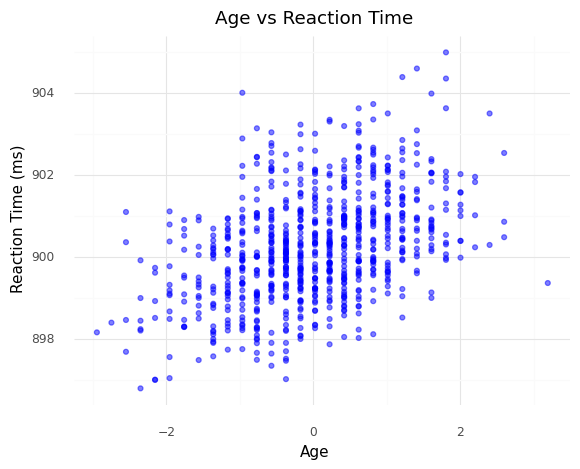

<ggplot: (8732198997829)>

In [ ]:
traindata = pd.concat([X_train, y_train], axis = 1)

(ggplot(traindata, aes(x = "age", y = "reaction_time")) + geom_point(color = "blue", alpha = 0.5) + theme_minimal() + xlab("Age") + ylab("Reaction Time (ms)") + ggtitle("Age vs Reaction Time"))

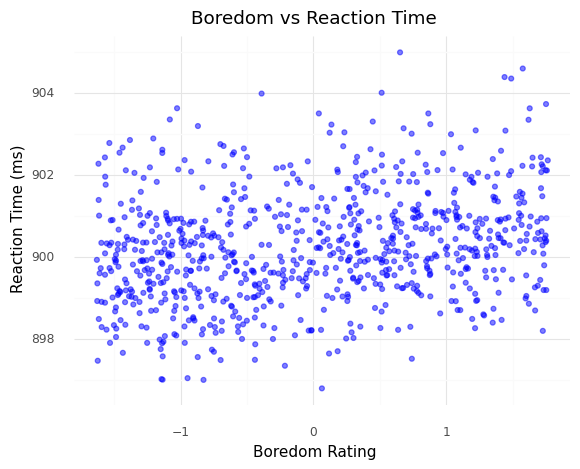

<ggplot: (8732195769341)>

In [ ]:
(ggplot(traindata, aes(x = "boredom_rating", y = "reaction_time")) + geom_point(color = "blue", alpha = 0.5) + theme_minimal() + xlab("Boredom Rating") + ylab("Reaction Time (ms)") + ggtitle("Boredom vs Reaction Time"))

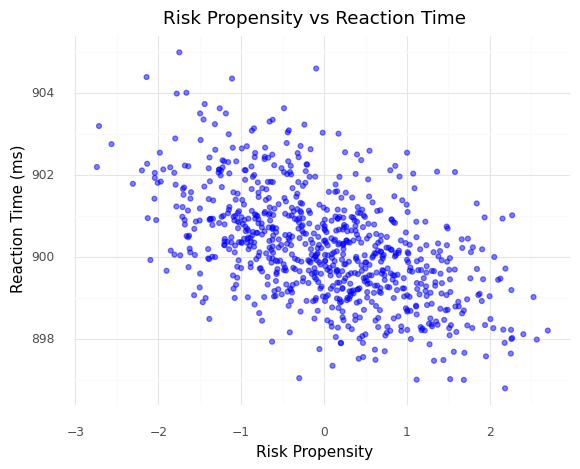

<ggplot: (8732195697461)>

In [ ]:
(ggplot(traindata, aes(x = "risk_propensity", y = "reaction_time")) + geom_point(color = "blue", alpha = 0.5) + theme_minimal() + xlab("Risk Propensity") + ylab("Reaction Time (ms)") + ggtitle("Risk Propensity vs Reaction Time"))

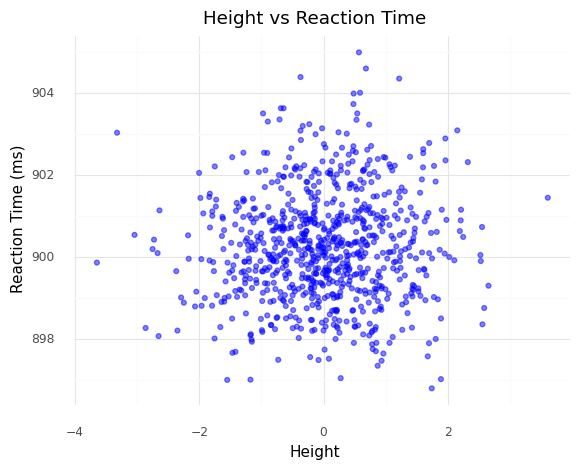

<ggplot: (8732198757781)>

In [ ]:
(ggplot(traindata, aes(x = "height", y = "reaction_time")) + geom_point(color = "blue", alpha = 0.5) + theme_minimal() + xlab("Height") + ylab("Reaction Time (ms)") + ggtitle("Height vs Reaction Time"))

All of these graphs display the relation between each predictor variable and reaction time. It is important to check for at least somewhat of a linear relationship in all these graphs. The way to check is to see if there is a trend of a constant rate of change as the x value increases. Each graph uses a different predictor variable for the x-axis. Age appears to have a strong positive linear relationship with reaction time. Boredom appears to have a weak positive linear relationship. Risk propensity seems to have a decent negative linear relationship. Height is quite a bit more difficult to determine. It is not perfectly clear as to whether or not this relationship is linear, however it does seem to possiblt have a slight positive linear relationship. With all of these interpretations, we can infer that this dataset could be modeled through linear regression and does in fact pass the linearity assumption.

# C

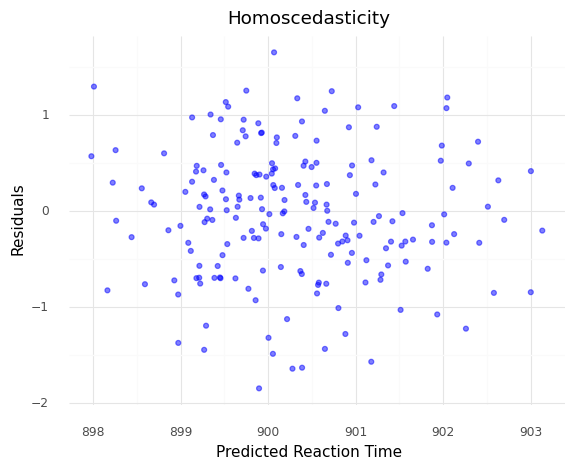

<ggplot: (8732195858597)>

In [ ]:
predicted = lr.predict(X_test)
residuals = y_test - predicted

assump = pd.DataFrame({"residual":residuals,"predicted":predicted})

(ggplot(assump, aes(x = "predicted", y = "residual")) + geom_point(color = "blue", alpha = 0.5)  + theme_minimal() + xlab("Predicted Reaction Time") + ylab("Residuals") + ggtitle("Homoscedasticity"))

This graph displays the predicted reaction time (ms) on the x-axis and Residuals on the y-axis. This helps to determine whether the assumption of homoscedasticity is passed. As you can see on this graph, the error remains somewhat constant throughout all ranges of x values. There is no convergence or divergence which would indicate heteroscedasticity. The error does not get exaggerated in certain ranges of x values. This means that the model is effective and the assumption of homoscedasticity is valid.

# D

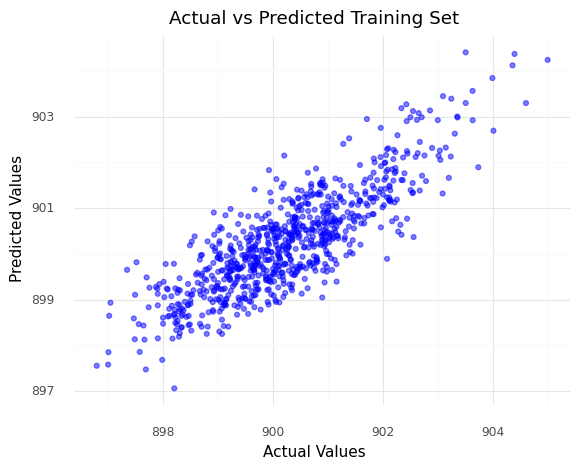

<ggplot: (8732195800149)>

In [ ]:
trainpred = lr.predict(X_train)

acvpredtrain = pd.DataFrame({"actual":y_train, "pred":trainpred})

(ggplot(acvpredtrain, aes(x = "actual", y = "pred")) + geom_point(color = "blue", alpha = 0.5)  + theme_minimal() + xlab("Actual Values") + ylab("Predicted Values") + ggtitle("Actual vs Predicted Training Set"))

In [ ]:
maetrain = mean_absolute_error(y_train, lr.predict(X_train))
print(maetrain)

0.5816780827257577


In [ ]:
r2train = r2_score(y_train, lr.predict(X_train))
print(r2train)

0.699063140708865


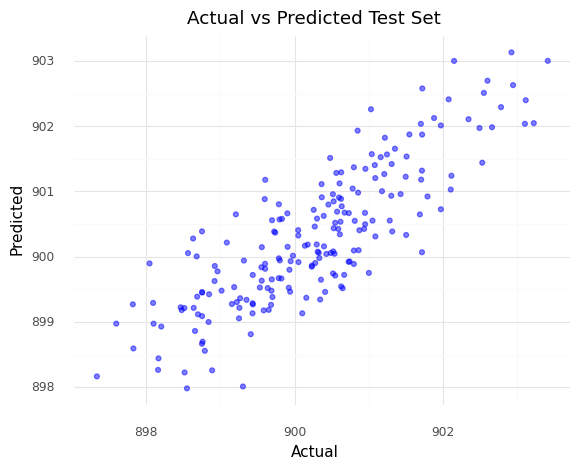

<ggplot: (8732195743817)>

In [ ]:
acvpredtest = pd.DataFrame({"actual":y_test, "pred":predicted})

(ggplot(acvpredtest, aes(x = "actual", y = "pred")) + geom_point(color = "blue", alpha = 0.5)  + theme_minimal() + xlab("Actual") + ylab("Predicted") + ggtitle("Actual vs Predicted Test Set"))


In [ ]:
maetest = mean_absolute_error(y_test, lr.predict(X_test))
print(maetest)

0.5320974306750919


In [ ]:
r2test = r2_score(y_test, lr.predict(X_test))
print(r2test)

0.7003787023967193


These graphs and data would indicate that this model is pretty effective at predicting the reaction time in this data set. The testing data set has a mean absolute error of about 0.53 while the r squared value is about 0.7. The closer the r squared value is to 1, the more accurate the model is. An r squared value of 0.7 indicates that the model is decently accurate at predicing reaction time from the predictor varibales. The mean absolute error value in my opinion is low enough to consider this model accurate, since a difference of 0.53 ms doesn't cause a huge amount of variance from the actual data.

# E

The r squared and mean absolute error values for both the training and testing data sets would indicate that the model is not overfit. There is a very miniscule difference between the r squared values, meaning that using r squared as a metric, the model has the same accuracy on both testing and training data. However, the mean absolute error values show about a 0.05 difference. Also, the mean absolute error value for the testing data is lower than that of the training data. This would indicate that model has less error in predicting values with the test set. In order for this data to be overfit, the mean absolute error value for the training data would have to be significantly lower than that of the testing set and the r squared value would have to be much higher than that of the testing set.

# F

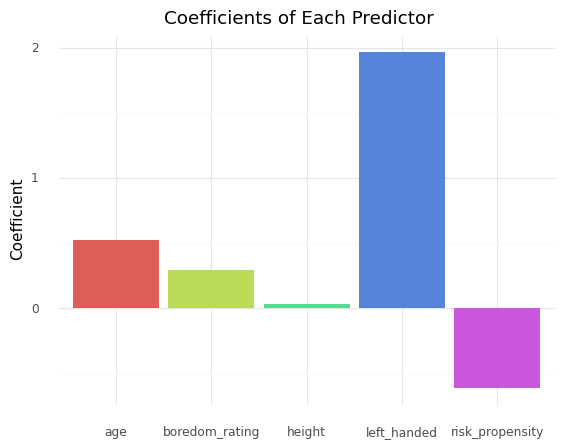

<ggplot: (8732198724597)>

In [ ]:
coef = pd.DataFrame({"Coef": lr.coef_, "Names": predictors})


(ggplot(coef, aes(x = "Names", y = "Coef", fill = "Names")) + geom_bar(stat = "identity") + theme_minimal() + theme_minimal() + xlab("") + ylab("Coefficient") + ggtitle("Coefficients of Each Predictor") + theme(legend_position = "none"))

In [ ]:
coef.head()

,Coef,Names
0,0.524683,age
1,0.296461,boredom_rating
2,-0.613970,risk_propensity
3,0.036236,height
4,1.962168,left_handed


The coefficient of 0.52 for age means for every 1 standard deviation difference in age, reaction time increases by 0.52 in ms.

The coefficient of 0.3 for boredom rating means for every 1 standard deviation difference in boredom rating, reaction time increases by 0.3 in ms.

The coefficient of -0.61 for risk propensity means for every 1 standard deviation difference in risk propensity, reaction time decreases by 0.61 in ms.

The coefficient of 0.04 for height means for every 1 standard deviation difference in height, reaction time increases by 0.04 in ms.

The coefficient of 01.96 for left handed means when an individual is left handed, their reaction time increases by 1.96 in ms.

In [ ]:
# doesn't show this cells output when downloading PDF
!pip install gwpy &> /dev/null

# installing necessary files
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

# installing pypandoc
!pip install pypandoc

# connecting your google drive
from google.colab import drive
drive.mount('/content/drive')

# copying your file over. Change "Class6-Completed.ipynb" to whatever your file is called (see top of notebook)
!cp "drive/My Drive/Colab Notebooks/Copy of HW1_SP22.ipynb" ./

# Again, replace "Class6-Completed.ipynb" to whatever your file is called (see top of notebook)
!jupyter nbconvert --to PDF "Copy of HW1_SP22.ipynb"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain